In [2]:
#!pip install pandas
import pandas as pd
#!pip install numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df = pd.read_pickle('Data_Preparation_EDA.pkl')

In [5]:
df_protocol = pd.read_pickle('Data_Preparation_Protocol_EDA.pkl')

In [4]:
df_text = pd.read_pickle('df_text_EDA.pkl')

In [7]:
df_num = pd.read_pickle('df_num_EDA.pkl')

In [7]:
df_category = pd.read_pickle('df_category_EDA.pkl')

In [29]:
df_dummy = pd.read_pickle('df_dummy_EDA.pkl')

# Data Cleansing

# Missing Data

In [11]:
import matplotlib.pyplot as plt
import seaborn as sb

In [9]:
df.isnull().head()

,first,last,gender,street,city,state,zip,lat,long,city_pop,...,merch_long,day,is_weekend,issuer,job_category,age_category,location,age,age_range,time_category
185,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
186,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
187,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
188,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
189,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


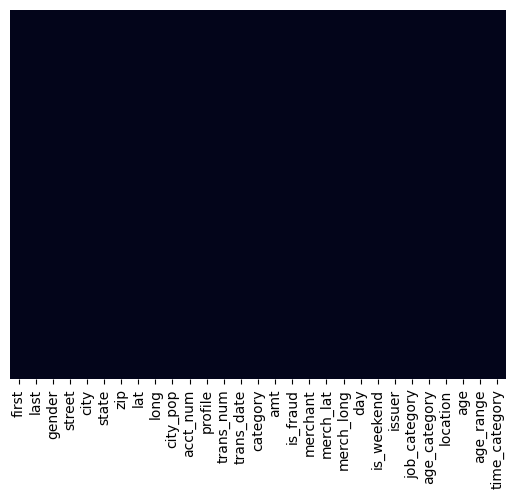

In [16]:
sb.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.show()

In [ ]:
# pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org missingno

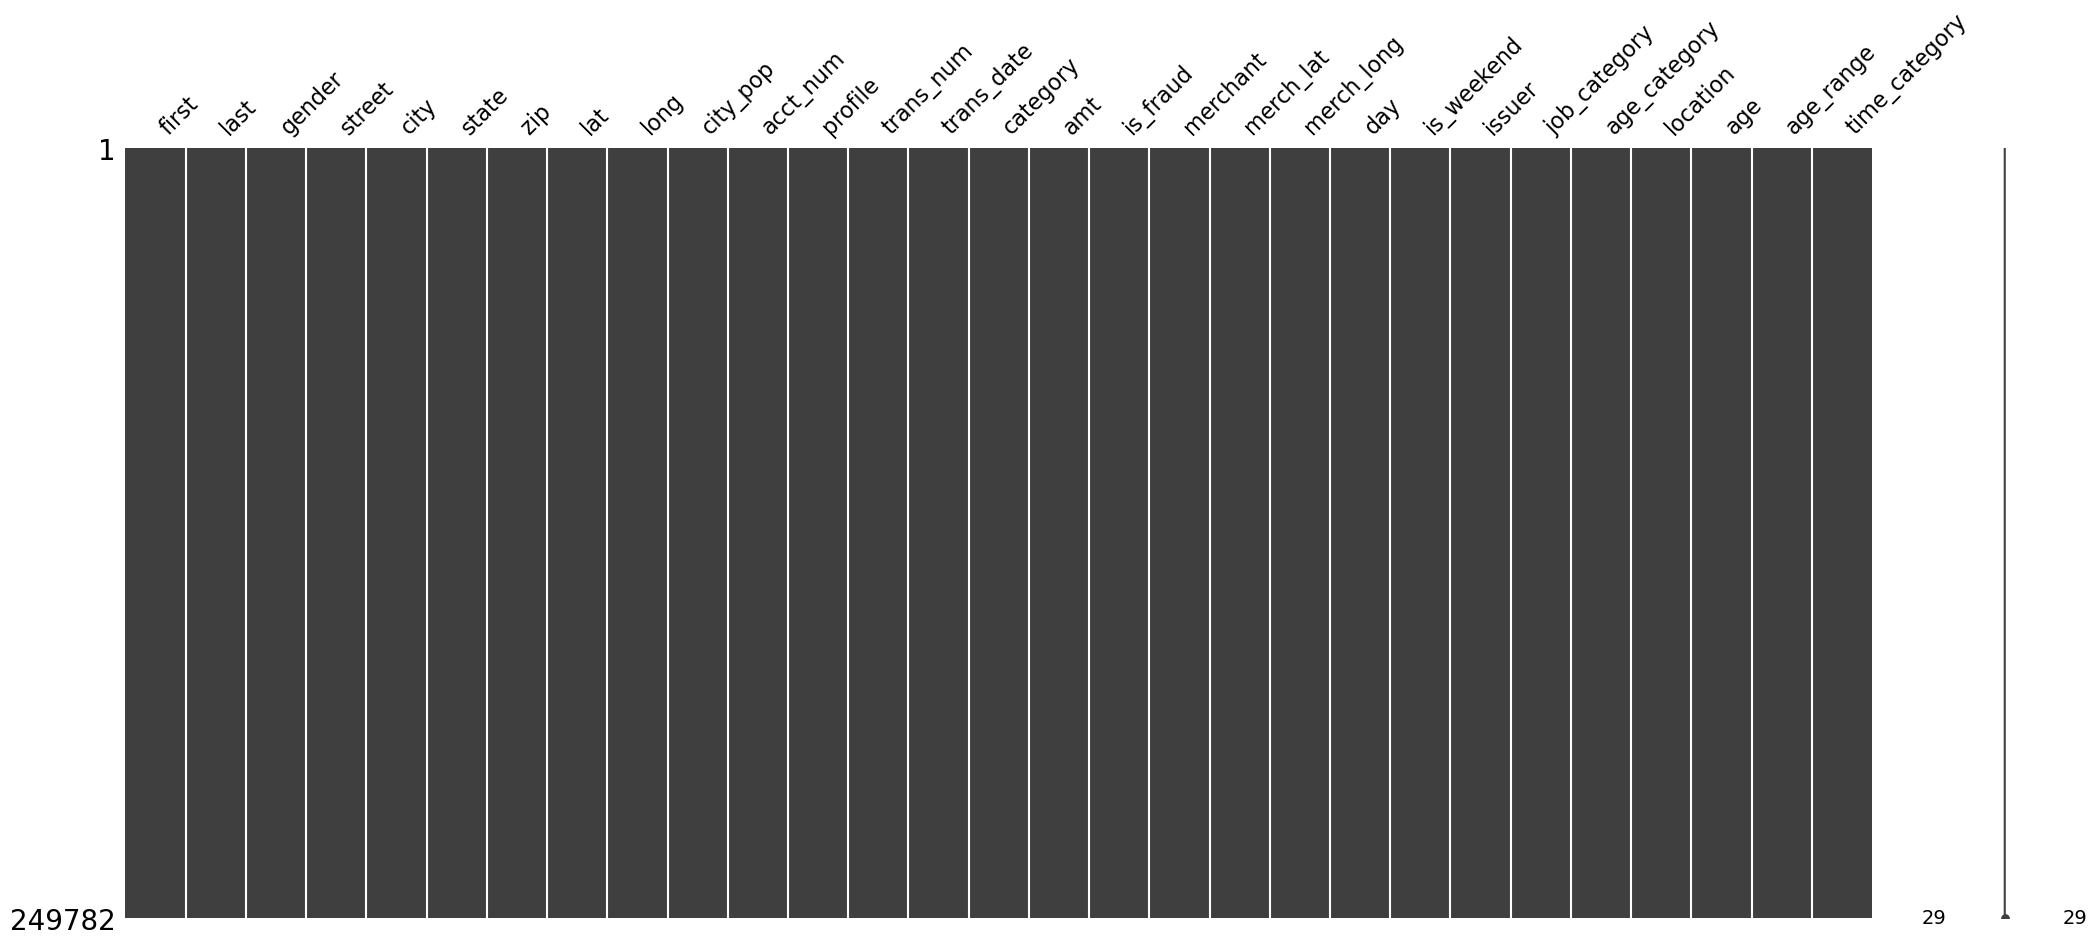

In [19]:
#missing value matrix by missingno libarary
# !pip install missingno
import missingno as msno
msno.matrix(df)
plt.show()

# Outliers

In [4]:
import numpy as np

# Apply the log transformation (assuming city_pop is in the DataFrame 'df')
df['city_pop_log'] = np.log(df['city_pop'])

In [8]:
# Assuming 'df' and 'df_num' are already defined
df_num['city_pop_log'] = df['city_pop_log']

In [9]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249782 entries, 185 to 1364535
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   zip           249782 non-null  int64  
 1   lat           249782 non-null  float64
 2   long          249782 non-null  float64
 3   city_pop      249782 non-null  int64  
 4   acct_num      249782 non-null  int64  
 5   amt           249782 non-null  float64
 6   merch_lat     249782 non-null  float64
 7   merch_long    249782 non-null  float64
 8   age           249782 non-null  int64  
 9   city_pop_log  249782 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 21.0 MB


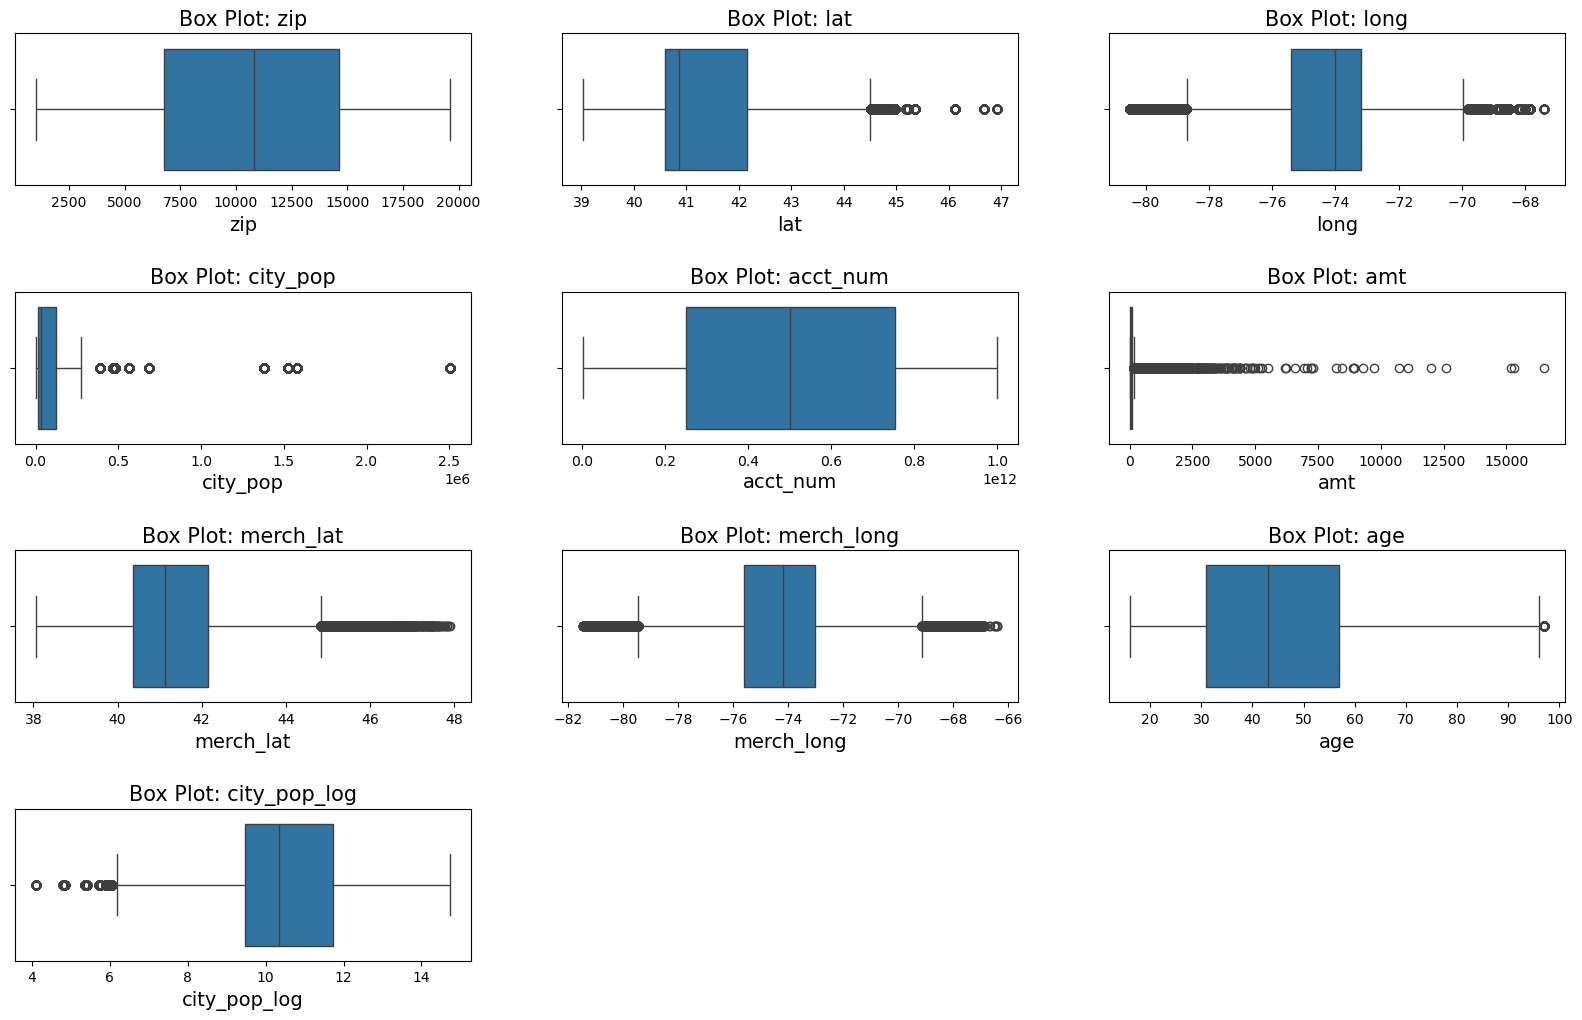

In [10]:
plt.figure(figsize=(20,200))

def outliers_boxplot(df_num):
    for i, col in enumerate(df_num.columns):
        if col != 'income':
            ax = plt.subplot(60, 3, i+1)
            sns.boxplot(data=df_num, x=col, ax=ax)
            plt.subplots_adjust(hspace = 0.7)
            plt.title('Box Plot: {}'.format(col), fontsize=15)
            plt.xlabel('{}'.format(col), fontsize=14)
        
outliers_boxplot(df_num)
plt.show()

# OUTLIERS DF

IQR method for identifying outliers to set up a boundary outside of Q1 and Q3

In [31]:
def outliers_df(df):
    total_outliers = pd.DataFrame(columns=['Outlier count', 'Percent'])

    for col in df_num:  # Ensure processing numeric columns only
        temp = pd.DataFrame(df_num[col])
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR
        # Filter rows that are outliers in either direction
        temp_outliers = temp[(temp[col] > upper_limit) | (temp[col] < lower_limit)]
        num_outliers = len(temp_outliers)
        total_outliers.loc[col] = [num_outliers, num_outliers / len(df) * 100]

    return total_outliers[total_outliers['Percent'] > 0]

# Assume con_df is your DataFrame
# Call the function and sort results
outliers_df = outliers_df(df_num).sort_values('Percent', ascending=False)
outliers_df

,Outlier count,Percent
city_pop,42765.0,17.120929
long,25148.0,10.067979
merch_long,14951.0,5.985619
amt,14035.0,5.618900
lat,4957.0,1.984531
merch_lat,3479.0,1.392815
age,92.0,0.036832


Labeling every outlier with 'Outlier'

In [32]:
def outliers(df):
    label_out_df = df_num.copy()
    for col in label_out_df:
        if col in outliers_df.index:
            Q1 = label_out_df[col].quantile(0.25)
            Q3 = label_out_df[col].quantile(0.75)
            upper_limit = Q1 + 1.5 * (Q3-Q1)
            lower_limit = Q3 - 1.5 * (Q3-Q1)
            label_out_df[col] = np.where(label_out_df[col] > upper_limit,'Outlier',np.where(label_out_df[col] < lower_limit,'Outlier',label_out_df[col]))
    return label_out_df
new_df_outliers = outliers(df)
new_df_outliers

,zip,lat,long,city_pop,acct_num,amt,merch_lat,merch_long,age
185,7005,40.9115,-74.414,15269,826475243361,81.83,41.497516,-74.258973,22
186,7005,40.9115,-74.414,15269,826475243361,68.48,40.661566,-73.84918,22
187,7005,40.9115,-74.414,15269,826475243361,9.54,41.655939,-75.234739,22
188,7005,40.9115,-74.414,15269,826475243361,2.93,40.062355,-74.923742,22
189,7005,40.9115,-74.414,15269,826475243361,1.3,41.285106,-74.645948,22
...,...,...,...,...,...,...,...,...,...
1364531,12414,42.2276,-73.8985,10510,846920444376,Outlier,41.833756,-74.700726,57
1364532,12414,42.2276,-73.8985,10510,846920444376,53.08,41.820045,-74.55525,57
1364533,12414,42.2276,-73.8985,10510,846920444376,Outlier,42.991588,-73.760047,57
1364534,12414,42.2276,-73.8985,10510,846920444376,66.31,42.047309,-73.327625,57


Crearting df_outliers with dummies

In [33]:
df_outliers = new_df_outliers.isin(['Outlier']) 
df_outliers = df_outliers.astype('int')
df_outliers

,zip,lat,long,city_pop,acct_num,amt,merch_lat,merch_long,age
185,0,0,0,0,0,0,0,0,0
186,0,0,0,0,0,0,0,0,0
187,0,0,0,0,0,0,0,0,0
188,0,0,0,0,0,0,0,0,0
189,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1364531,0,0,0,0,0,1,0,0,0
1364532,0,0,0,0,0,0,0,0,0
1364533,0,0,0,0,0,1,0,0,0
1364534,0,0,0,0,0,0,0,0,0


creating df without ouliers so we can compare the corr and distribution in both datasets

In [34]:
### differences between two correlation in Python: https://github.com/psinger/CorrelationStats
### We will only take from the code the Fisher method for two-tailed test
def cocor(x1,y1, x2,y2):
    xy1 = x1.corr(y1, method='spearman')
    xy2 = x2.corr(y2, method='spearman')
    n1 = len(x1)
    n2 = len(x2)
    xy_z = 0.5 * np.log((1 + xy1)/(1 - xy1))
    ab_z = 0.5 * np.log((1 + xy2)/(1 - xy2))
    if n2 is None:
        n2 = n1
    se_diff_r = np.sqrt(1/(n1 - 3) + 1/(n2 - 3))
    diff = xy_z - ab_z
    z = abs(diff / se_diff_r)
    p = (1 - norm.cdf(z)) * 2
    return z, p

A table indicating changes

In [35]:
df_num = df_num.drop(['zip'], axis=1)

In [36]:
df_num = df_num.drop(['acct_num'], axis=1)

In [37]:
from scipy.stats import norm, ks_2samp
import numpy as np
import pandas as pd

c = df_num
names = c.columns

# Creating df that reflects the correlation change
out_df = pd.DataFrame(columns=['feature', 'outliers_cnt', 'distribution_changed', 'correlation_changed'])

# A copy of numeric df
no_outliers = df_num.copy()
np.seterr(divide='ignore', invalid='ignore')

rows = []  # Collect rows here to avoid repeatedly modifying the DataFrame
for i in names:
    # Data with outliers
    out = df[i]
    # Data without outliers
    non = df[i].loc[df_outliers[i] == 0]
    # Labels with outliers
    is_fraud_out = df['is_fraud']
    # Labels without outliers
    is_fraud_non = df['is_fraud'].loc[df_outliers[i] == 0]
    
    # Correlation p-value
    p, pvalue = cocor(out, is_fraud_out, non, is_fraud_non)
    cor_change = np.where(pvalue < 0.05, '+', '-')
    # Outliers count
    mv = df_outliers.sum()
    # KS test p-value
    pval = ks_2samp(out, non)[1]
    dist_change = np.where(pval < 0.05, '+', '-')
    
    # Append the data as a dictionary
    rows.append({
        'feature': i,
        'outliers_cnt': mv,
        'distribution_changed': dist_change,
        'correlation_changed': cor_change
    })

# Use pd.DataFrame to create out_df from rows
out_df = pd.DataFrame(rows)

# Display the first 10 rows
out_df.head(10)

,feature,outliers_cnt,distribution_changed,correlation_changed
0,lat,zip 0 lat 34126 long ...,+,-
1,long,zip 0 lat 34126 long ...,+,+
2,city_pop,zip 0 lat 34126 long ...,+,-
3,amt,zip 0 lat 34126 long ...,+,+
4,merch_lat,zip 0 lat 34126 long ...,+,-
5,merch_long,zip 0 lat 34126 long ...,+,+
6,age,zip 0 lat 34126 long ...,+,+


In [38]:
#All 'Yes' Vars in the 'Drop'colums shall be deleted, since the infect correlation and distribution. 
#We don't want to delete vars that will change both corr only
out_df['drop']='yes'
out_df.loc[(out_df.distribution_changed=='+')& (out_df.correlation_changed=='+'),'drop'] = 'no'
out_df

,feature,outliers_cnt,distribution_changed,correlation_changed,drop
0,lat,zip 0 lat 34126 long ...,+,-,yes
1,long,zip 0 lat 34126 long ...,+,+,no
2,city_pop,zip 0 lat 34126 long ...,+,-,yes
3,amt,zip 0 lat 34126 long ...,+,+,no
4,merch_lat,zip 0 lat 34126 long ...,+,-,yes
5,merch_long,zip 0 lat 34126 long ...,+,+,no
6,age,zip 0 lat 34126 long ...,+,+,no


In [39]:
# Getting relevant columns and features
relevant_columns=out_df.loc[out_df['drop']=='yes']
relevant_columns

,feature,outliers_cnt,distribution_changed,correlation_changed,drop
0,lat,zip 0 lat 34126 long ...,+,-,yes
2,city_pop,zip 0 lat 34126 long ...,+,-,yes
4,merch_lat,zip 0 lat 34126 long ...,+,-,yes


In [40]:
# Getting relevant columns and features
relevant_columns_features=out_df.loc[out_df['drop']=='yes']['feature']
relevant_columns_features

0          lat
2     city_pop
4    merch_lat
Name: feature, dtype: object

#### Outliers result:

After the investigation of the outliers, this df does not have outliers that affect it, city population outliers may give us usfull information therfore this outliers will not be deleted.

In [41]:
import pickle
with open('fruad_outliers_protocol.pkl', 'wb') as f:
    pickle.dump(df_protocol, f)

print("fruad_outliers_protocol saved as a pickle file.")

fruad_outliers_protocol saved as a pickle file.


In [42]:
with open('outliers.pkl', 'wb') as f:
    pickle.dump(df, f)

print("outliers saved as a pickle file.")

outliers saved as a pickle file.


In [43]:
with open('fruad_num_outliers.pkl', 'wb') as f:
    pickle.dump(df_num, f)

print("fruad_num_outliers saved as a pickle file.")

fruad_num_outliers saved as a pickle file.


In [44]:
with open('fruad_dummy_outliers.pkl', 'wb') as f:
    pickle.dump(df_dummy, f)

print("fruad_dummy_outliers saved as a pickle file.")

fruad_dummy_outliers saved as a pickle file.


In [45]:
with open('fruad_category_outliers.pkl', 'wb') as f:
    pickle.dump(df_category, f)

print("fruad_category_outliers saved as a pickle file.")

fruad_category_outliers saved as a pickle file.


In [46]:
with open('fruad_text_outliers.pkl', 'wb') as f:
    pickle.dump(df_text, f)

print("fruad_text_outliers saved as a pickle file.")

fruad_text_outliers saved as a pickle file.
